In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

D:\Anaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
data_dir = 'Data_rock_paper_scissor_KAGGLE/Rock-Paper-Scissors-2/'
print(os.listdir(data_dir))

['paper', 'rock', 'scissors']


In [4]:
Name=['paper','rock','scissors']
print(Name)
print(len(Name))

['paper', 'rock', 'scissors']
3


In [5]:
mapping={"paper":0,"rock":1,"scissors":2}
reverse_mapping={0:'paper',1:'rock',2:'scissors'}

In [6]:
dataX=[]
dataY0=[]
count=0
for name in Name:
    path=os.path.join(data_dir,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        if type(image)==np.ndarray and image.shape[0]>10 and image.shape[1]>10:
            image3=cv2.resize(image,dsize=(100,100),interpolation=cv2.INTER_CUBIC)
            dataX+=[image3]
            dataY0+=[count]
    count+=1

In [7]:
dataX=np.array(dataX)
dataY0=np.array(dataY0)

In [8]:
m=len(dataX)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [9]:
trainX=dataX[M[0:(m//4)*3]]
trainY0=dataY0[M[0:(m//4)*3]]
testX=dataX[M[(m//4)*3:]]
testY0=dataY0[M[(m//4)*3:]]

In [10]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [11]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [12]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1312, 100, 100, 3)
(329, 100, 100, 3)
(1312, 3)
(329, 3)


In [13]:
datagen = ImageDataGenerator(horizontal_flip=True,
                            vertical_flip=True,rotation_range=20,zoom_range=0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.1,
                            fill_mode="nearest")

In [14]:
pretrained_model = tf.keras.applications.ResNet50(input_shape=(100,100,3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        pooling='avg')
pretrained_model.trainable = False

In [15]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
41/41 [==============================] - 38s 844ms/step - loss: 0.4069 - accuracy: 0.8651 - val_loss: 0.1303 - val_accuracy: 0.9392
Epoch 2/10
41/41 [==============================] - 35s 850ms/step - loss: 0.1017 - accuracy: 0.9627 - val_loss: 0.0523 - val_accuracy: 0.9878
Epoch 3/10
41/41 [==============================] - 31s 748ms/step - loss: 0.1013 - accuracy: 0.9657 - val_loss: 0.0403 - val_accuracy: 0.9878
Epoch 4/10
41/41 [==============================] - 32s 780ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0192 - val_accuracy: 0.9970
Epoch 5/10
41/41 [==============================] - 32s 783ms/step - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0327 - val_accuracy: 0.9909
Epoch 6/10
41/41 [==============================] - 32s 772ms/step - loss: 0.0529 - accuracy: 0.9809 - val_loss: 0.0106 - val_accuracy: 0.9970
Epoch 7/10
41/41 [==============================] - 31s 761ms/step - loss: 0.0521 - accuracy: 0.9863 - val_loss: 0.0168 - val_accuracy: 0.9909

In [17]:
# model.save('Data_rock_paper_scissor_KAGGLE/RPS_detectionModel_v4.h5')

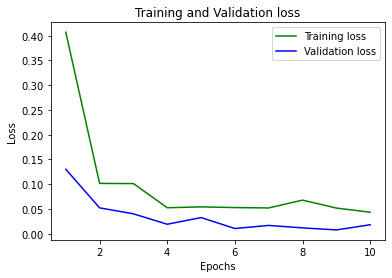

In [18]:
loss_train = his.history['loss']
loss_val = his.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

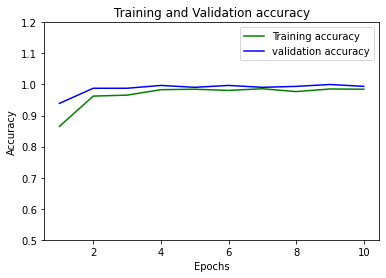

In [20]:
acc_train = his.history['accuracy']
acc_val = his.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.ylim(.50,1.2)
plt.legend()
plt.show()